In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import BaggingClassifier

# Loading the data

In [2]:
sns.set(style="whitegrid")
data = pd.read_csv("../Data/UCI_Credit_Card.csv")
pd.set_option('display.max_columns', None)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Dataset Overview

In [3]:
print("="*50)
print(f"Dataset shape: {data.shape[0]} rows, {data.shape[1]} columns")
print(f"\nData types:")
print(data.dtypes.value_counts())

print("\n" + "="*50)
print("TARGET VARIABLE ANALYSIS")
print("="*50)
print("Class distribution:")
class_dist = data['default.payment.next.month'].value_counts()
print(class_dist)
print("\nClass proportions:")
print(data['default.payment.next.month'].value_counts(normalize=True))

print("\n" + "="*50)
print("MISSING VALUES CHECK")
print("="*50)
missing_values = data.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print(missing_values[missing_values > 0])

print("\n" + "="*50)  
print("STATISTICAL SUMMARY")
print("="*50)
print(data.describe())

Dataset shape: 30000 rows, 25 columns

Data types:
float64    13
int64      12
Name: count, dtype: int64

TARGET VARIABLE ANALYSIS
Class distribution:
default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

Class proportions:
default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

MISSING VALUES CHECK
No missing values found!

STATISTICAL SUMMARY
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000

In [4]:
data.columns 

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [13]:
data = data[(data['MARRIAGE'] != 0) & (data['EDUCATION'] != 0)]
data.shape[0]

29932

# Distribution of Target Variable

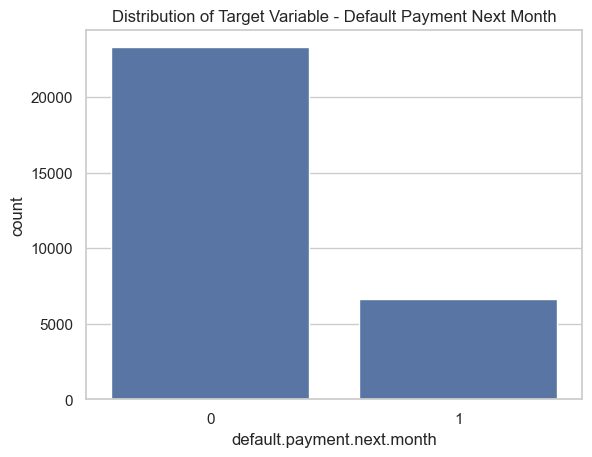

In [14]:
sns.countplot(x='default.payment.next.month', data=data)
plt.title("Distribution of Target Variable - Default Payment Next Month")
plt.savefig('DistributionOfTargetVariable.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation Heatmap

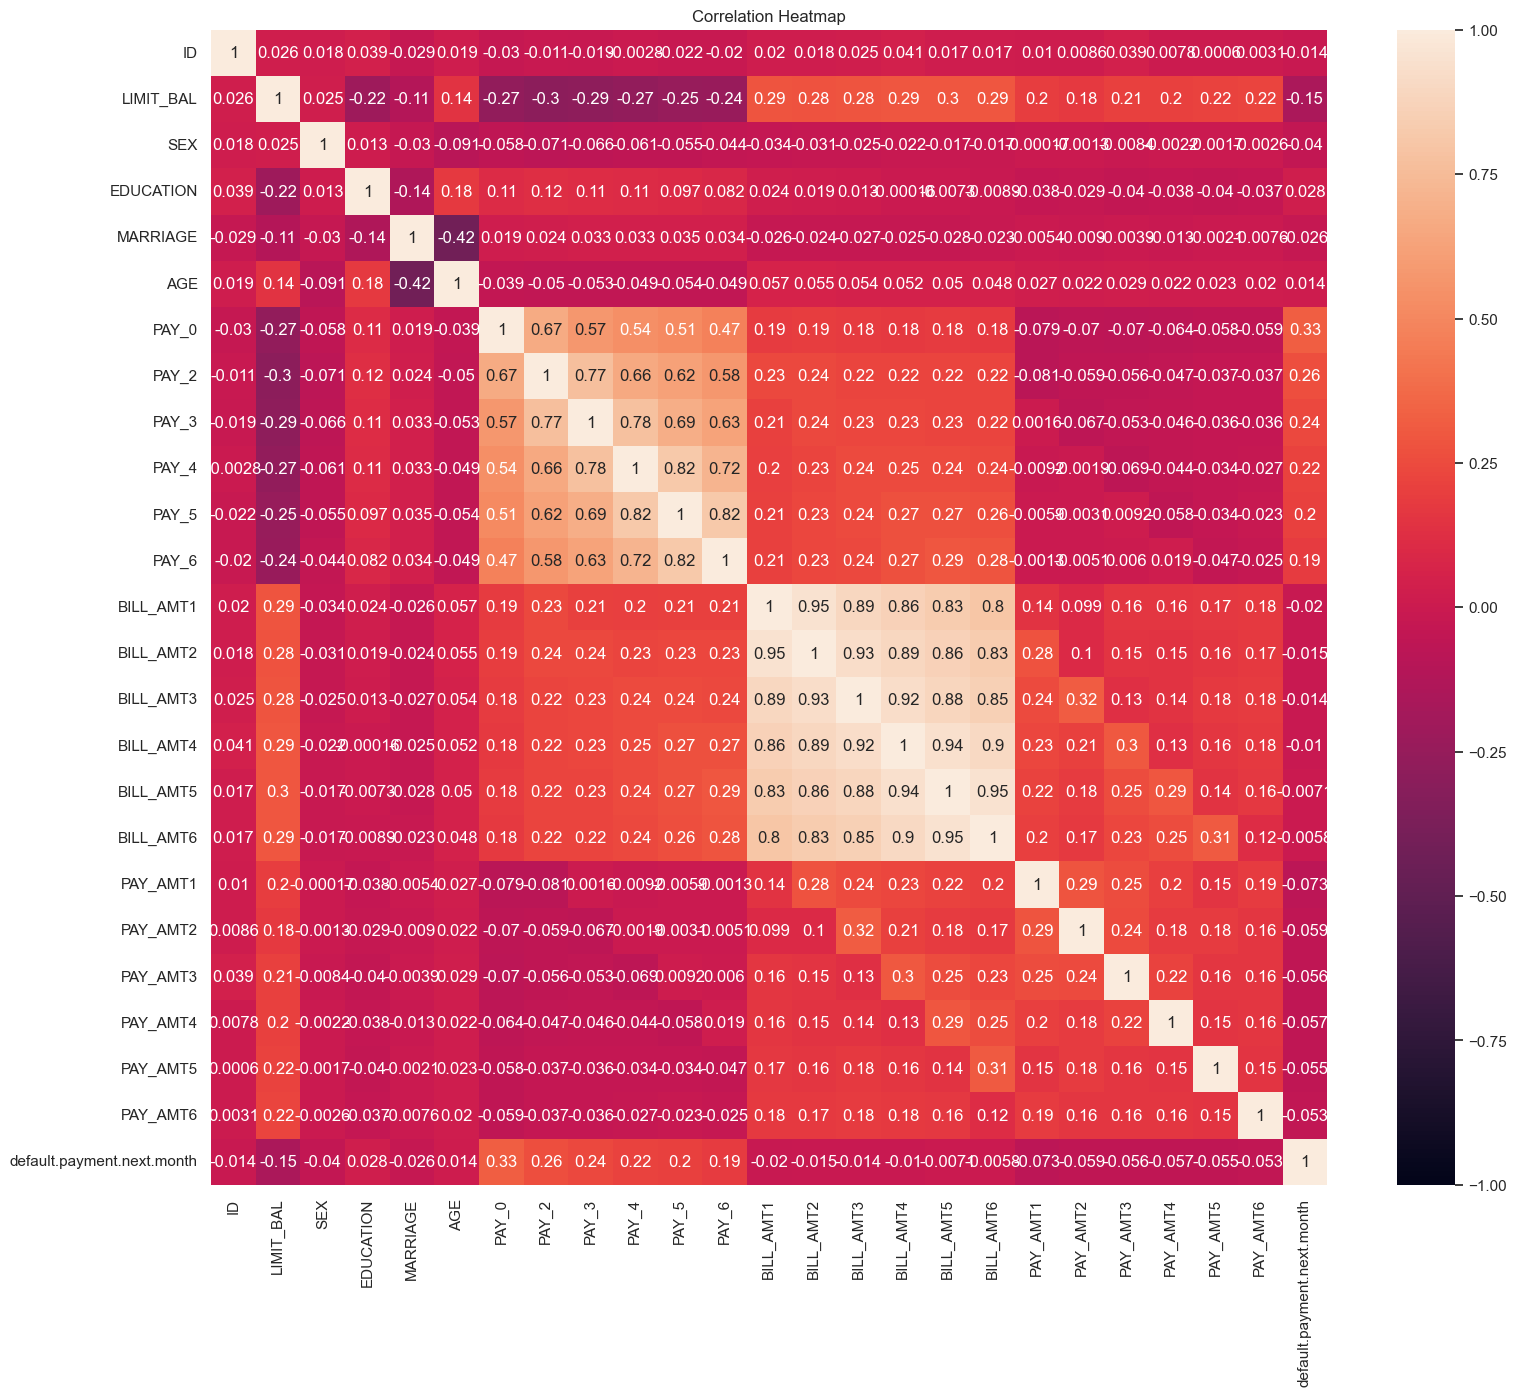

In [15]:
corr = data.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0)
plt.title("Correlation Heatmap")
#plt.savefig('Correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# Enhanced visualizations

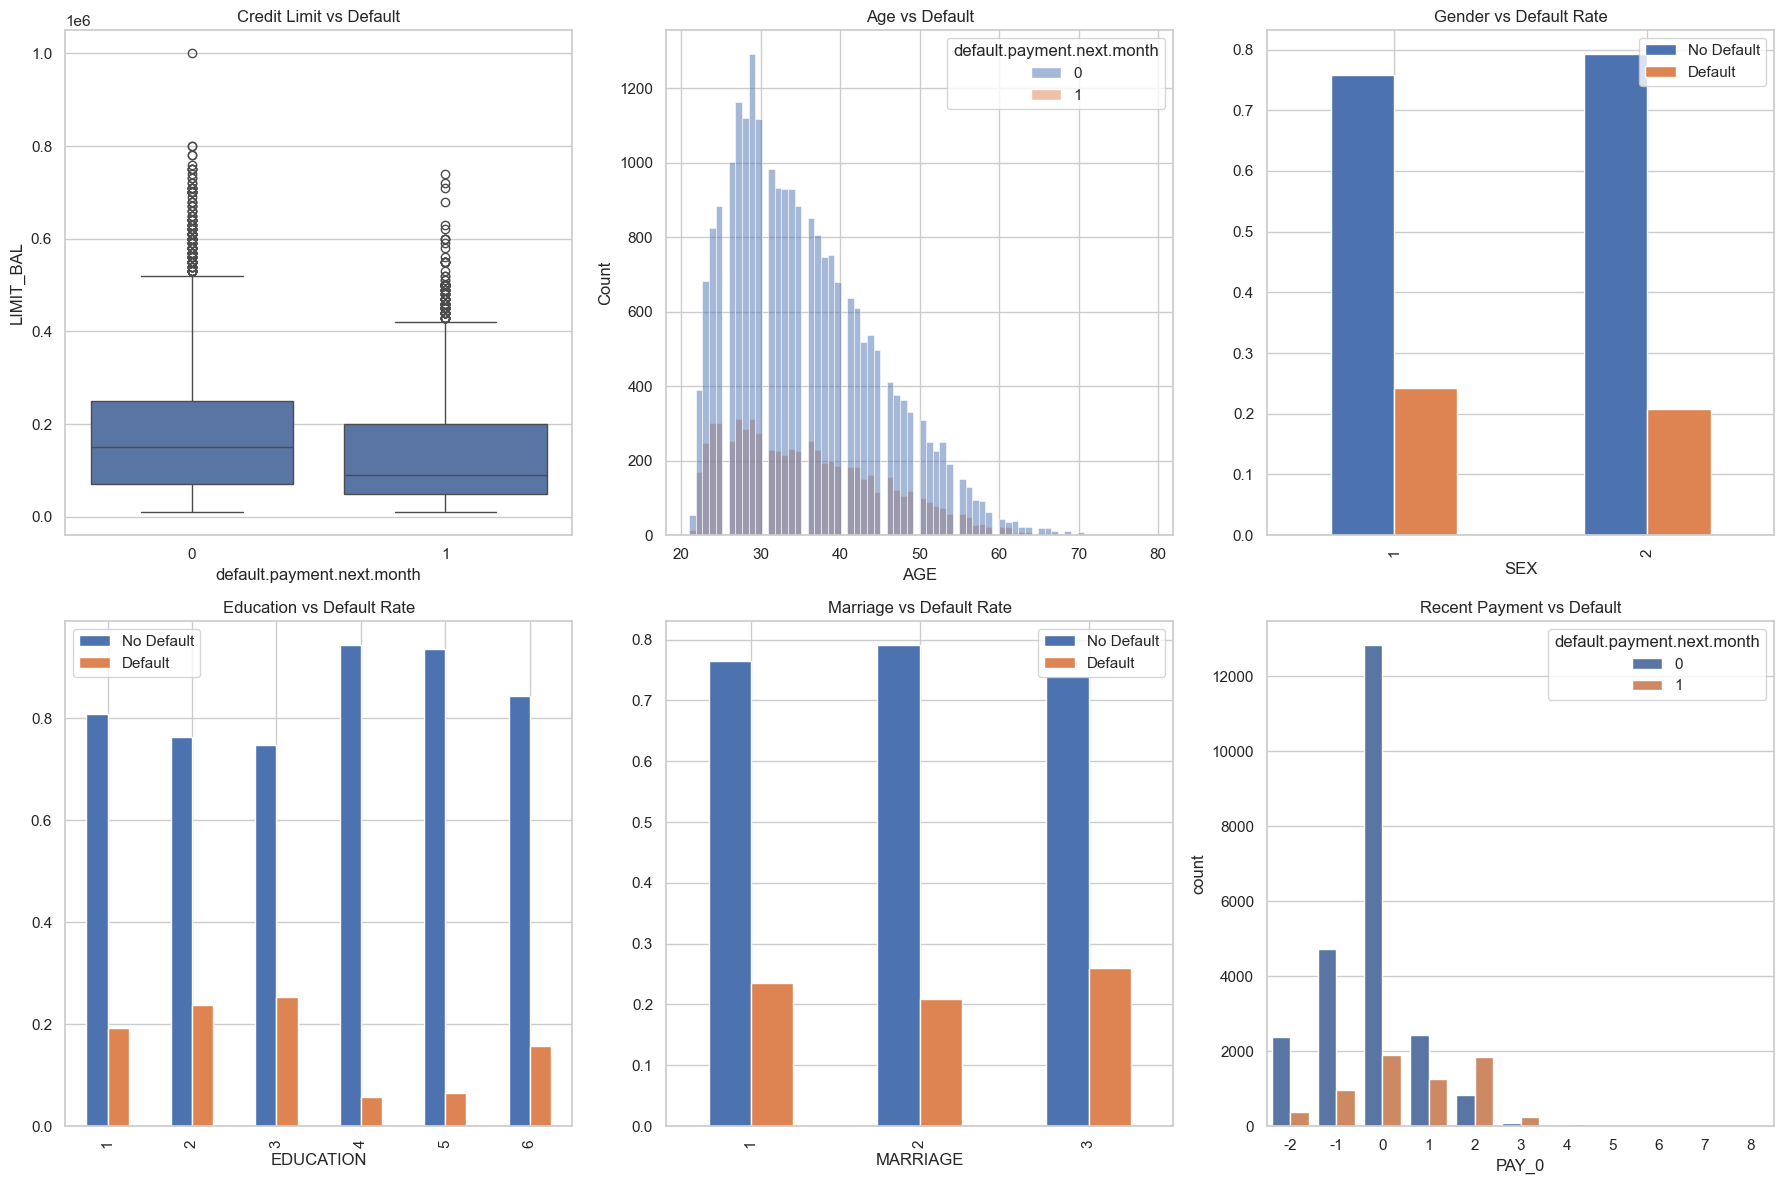

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Boxplot: Credit limit and default
sns.boxplot(x='default.payment.next.month', y='LIMIT_BAL', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Credit Limit vs Default')

# Histogram: Age distribution and default
sns.histplot(x='AGE', hue='default.payment.next.month', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Default')

# Bar plot: Gender and default rate
gender_table = pd.crosstab(data['SEX'], data['default.payment.next.month'], normalize='index')
gender_table.plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Gender vs Default Rate')
axes[0, 2].legend(['No Default', 'Default'])

# Bar plot: Education and default rate
edu_table = pd.crosstab(data['EDUCATION'], data['default.payment.next.month'], normalize='index')
edu_table.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Education vs Default Rate')
axes[1, 0].legend(['No Default', 'Default'])

# Bar plot: Marriage and default rate
marriage_table = pd.crosstab(data['MARRIAGE'], data['default.payment.next.month'], normalize='index')
marriage_table.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Marriage vs Default Rate')
axes[1, 1].legend(['No Default', 'Default'])

# Count plot: Recent payment status
sns.countplot(x='PAY_0', hue='default.payment.next.month', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Recent Payment vs Default')

# Adjust layout
plt.tight_layout()
#plt.savefig('Visualizations.png', dpi=300, bbox_inches='tight')
plt.show()


# Data Preprocessing

### - Function for encoding the dummy variables

In [17]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

### - Removing unnecessary variables (e.g., ID)
### - One-hot encoding 'EDUCATION' and 'MARRIAGE' columns
### - Splitting the data into features (X) and target (y)
### - Scaling features using StandardScaler


In [18]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop ID
    df = df.drop('ID', axis=1)
    
    df = onehot_encode(
        df,
        {
            'EDUCATION': 'EDU',
            'MARRIAGE': 'MAR'
        }
    )
    
    # Split df into X and y
    y = df['default.payment.next.month'].copy()
    X = df.drop('default.payment.next.month', axis=1).copy()
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [19]:
X, y = preprocess_inputs(data)
X

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_1,MAR_2,MAR_3
0,-1.136377,0.810441,-1.245239,1.794683,1.782197,-0.697299,-0.667250,-1.530779,-1.487013,-0.642995,-0.647780,-0.668381,-0.672841,-0.663455,-0.653139,-0.341854,-0.226997,-0.296596,-0.308036,-0.314197,-0.293448,-0.739455,1.065055,-0.440977,-0.064236,-0.097174,-0.041313,1.091796,-1.068347,-0.104445
1,-0.366074,0.810441,-1.028293,-0.875707,1.782197,0.138566,0.188307,0.234386,1.992108,-0.659699,-0.667112,-0.639665,-0.622021,-0.606671,-0.598425,-0.341854,-0.213510,-0.239844,-0.244263,-0.314197,-0.181057,-0.739455,1.065055,-0.440977,-0.064236,-0.097174,-0.041313,-0.915922,0.936026,-0.104445
2,-0.597165,0.810441,-0.160510,0.014423,0.111311,0.138566,0.188307,0.234386,0.252548,-0.299327,-0.494402,-0.482944,-0.450257,-0.417779,-0.392251,-0.250163,-0.191827,-0.239844,-0.244263,-0.248811,-0.012470,-0.739455,1.065055,-0.440977,-0.064236,-0.097174,-0.041313,-0.915922,0.936026,-0.104445
3,-0.905286,0.810441,0.164909,0.014423,0.111311,0.138566,0.188307,0.234386,0.252548,-0.058450,-0.014178,0.031900,-0.233078,-0.187503,-0.157386,-0.221049,-0.169321,-0.228493,-0.237885,-0.244299,-0.237253,-0.739455,1.065055,-0.440977,-0.064236,-0.097174,-0.041313,1.091796,-1.068347,-0.104445
4,-0.905286,-1.233897,2.334368,-0.875707,0.111311,-0.697299,0.188307,0.234386,0.252548,-0.579163,-0.611728,-0.161981,-0.347609,-0.348784,-0.332151,-0.221049,1.333814,0.270926,0.265922,-0.269146,-0.255291,-0.739455,1.065055,-0.440977,-0.064236,-0.097174,-0.041313,1.091796,-1.068347,-0.104445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29927,0.404229,-1.233897,0.381855,0.014423,0.111311,0.138566,0.188307,0.234386,0.252548,1.867886,2.015636,2.323914,0.694004,-0.150064,-0.385020,0.171567,0.610434,-0.012665,-0.113719,0.012733,-0.237253,-0.739455,-0.938919,2.267690,-0.064236,-0.097174,-0.041313,1.091796,-1.068347,-0.104445
29928,-0.134983,-1.233897,0.815747,-0.875707,-0.724133,-0.697299,-0.667250,0.234386,0.252548,-0.673255,-0.665666,-0.627850,-0.533382,-0.578155,-0.653139,-0.230895,-0.103969,0.214060,-0.299809,-0.314197,-0.293448,-0.739455,-0.938919,2.267690,-0.064236,-0.097174,-0.041313,-0.915922,0.936026,-0.104445
29929,-1.059347,-1.233897,0.164909,3.574942,2.617640,1.810295,-0.667250,0.234386,0.252548,-0.647717,-0.644214,-0.638570,-0.348571,-0.325182,-0.328359,-0.341854,-0.256876,0.951951,-0.040189,-0.183425,-0.119242,-0.739455,1.065055,-0.440977,-0.064236,-0.097174,-0.041313,-0.915922,0.936026,-0.104445
29930,-0.674195,-1.233897,0.598801,0.904553,-0.724133,0.138566,0.188307,0.234386,-0.617232,-0.718416,0.409048,0.421116,0.146825,-0.468614,0.168065,4.846723,-0.109043,-0.229742,-0.185209,3.148903,-0.192071,-0.739455,-0.938919,2.267690,-0.064236,-0.097174,-0.041313,1.091796,-1.068347,-0.104445


# Modeling

### - Train-Test Split and handling class imbalance with Random Oversampling

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=444)

In [21]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

4621
16331


In [22]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [23]:
print(len(y_train_resampled[y_train_resampled == 1]))
print(len(y_train_resampled[y_train_resampled == 0]))

16331
16331


### - Training the models

In [24]:
models = {
    LogisticRegression(max_iter=1000):        "     Logistic Regression",
    KNeighborsClassifier(n_neighbors=int(np.sqrt(30000))):      "     K-Nearest Neighbors",
    SVC(probability=False):                   "  Support Vector Machine",
    DecisionTreeClassifier():                 "           Decision Tree",
    GaussianNB():                             "             Naive Bayes",
     BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42): 
                                             "  Bagging (Decision Tree)"
}

for model, name in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    print(f"{name} trained.")

     Logistic Regression trained.
     K-Nearest Neighbors trained.
  Support Vector Machine trained.
           Decision Tree trained.
             Naive Bayes trained.
  Bagging (Decision Tree) trained.


### - Test Accuracy

In [25]:
for model, name in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

     Logistic Regression: 68.10%
     K-Nearest Neighbors: 77.06%
  Support Vector Machine: 77.42%
           Decision Tree: 73.78%
             Naive Bayes: 36.21%
  Bagging (Decision Tree): 80.78%


# Performance metrics

In [26]:
# Dictionary to store results
results = {}

# Loop through each model
for model, model_name in models.items():
    # Train the model on resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Use 3-fold cross-validation to check model accuracy
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy')
    avg_cv_score = np.mean(cv_scores)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Get predicted probabilities (for ROC-AUC)
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)
    
    # Save everything in a dictionary
    results[model_name.strip()] = {
        'CV Accuracy': avg_cv_score,
        'Test Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC-AUC': auc
    }

# Show all results as a table
results_df = pd.DataFrame(results)
print(results_df.round(3))

               Logistic Regression  K-Nearest Neighbors  \
CV Accuracy                  0.669                0.683   
Test Accuracy                0.681                0.771   
Precision                    0.378                0.489   
Recall                       0.656                0.534   
F1 Score                     0.479                0.510   
ROC-AUC                      0.729                0.752   

               Support Vector Machine  Decision Tree  Naive Bayes  \
CV Accuracy                     0.720          0.873        0.566   
Test Accuracy                   0.774          0.735        0.362   
Precision                       0.496          0.409        0.251   
Recall                          0.593          0.413        0.930   
F1 Score                        0.540          0.411        0.395   
ROC-AUC                         0.766          0.620        0.743   

               Bagging (Decision Tree)  
CV Accuracy                      0.928  
Test Accuracy       

### - ROC Curves Comparison

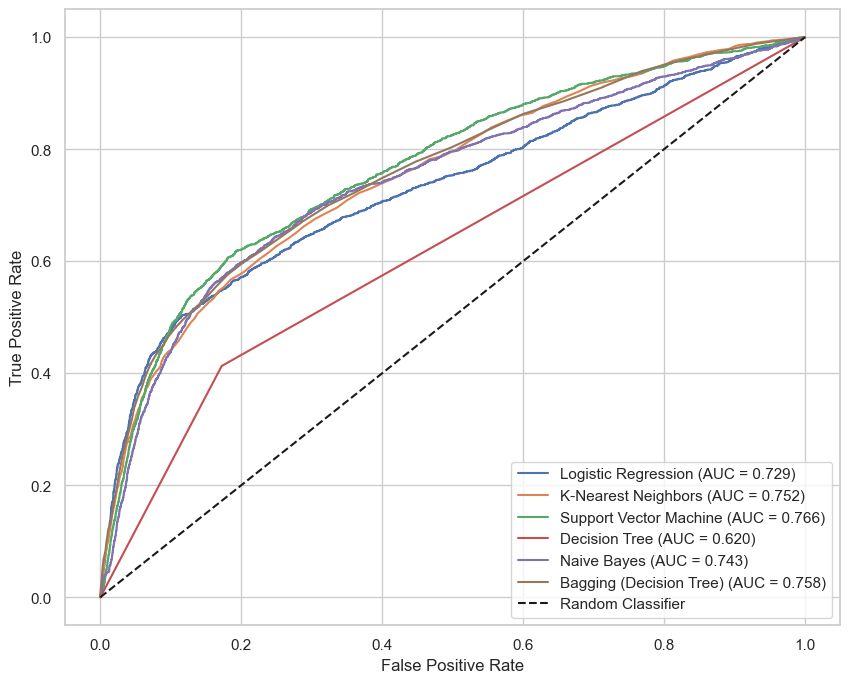

In [27]:
plt.figure(figsize=(10, 8))
for model, name in models.items():
    try:
        if hasattr(model, 'predict_proba'):
            y_probs = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_probs = model.decision_function(X_test)
        else:
            continue
            
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = roc_auc_score(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{name.strip()} (AUC = {auc_score:.3f})')
    except:
        print(f"Couldn't plot ROC for {name}")
        continue

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
#plt.savefig('ROC.png', dpi=300, bbox_inches='tight')
plt.show()

### - Logistic Regression - Coefficients 

In [28]:
model_ = LogisticRegression(max_iter=1000)
model_.fit(X_train_resampled, y_train_resampled)

# Get coefficients and intercept
coefs = model_.coef_[0]
intercept = model_.intercept_[0]
feature_names = X.columns

# Create DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})

# Add intercept
intercept_row = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]})
coef_df = pd.concat([intercept_row, coef_df], ignore_index=True)

# sort
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print(coef_df[['Feature', 'Coefficient']])


      Feature  Coefficient
4       PAY_0     0.576013
10  BILL_AMT1    -0.378230
17   PAY_AMT2    -0.213820
0   Intercept    -0.191539
16   PAY_AMT1    -0.184269
12  BILL_AMT3     0.162755
14  BILL_AMT5     0.132317
26      EDU_5    -0.116430
5       PAY_2     0.109491
19   PAY_AMT4    -0.106813
1   LIMIT_BAL    -0.079456
11  BILL_AMT2     0.077611
15  BILL_AMT6    -0.066338
18   PAY_AMT3    -0.066169
25      EDU_4    -0.060027
3         AGE     0.058485
29      MAR_2    -0.053826
28      MAR_1     0.051382
20   PAY_AMT5    -0.046758
6       PAY_3     0.046293
2         SEX    -0.045001
22      EDU_1     0.037468
7       PAY_4     0.035124
21   PAY_AMT6    -0.032243
13  BILL_AMT4    -0.024986
8       PAY_5     0.020850
30      MAR_3     0.012215
24      EDU_3    -0.009856
9       PAY_6    -0.004932
23      EDU_2     0.001632
27      EDU_6    -0.000955


# Summarize

In [29]:
best_model_name = max(results.keys(), key=lambda x: results[x]['Test Accuracy'])
best_accuracy = results[best_model_name]['Test Accuracy']

print(f"Best performing model: {best_model_name}")
print(f"Best accuracy achieved: {best_accuracy:.3f}")

print(f"\nModel Rankings by Accuracy:")
sorted_models = sorted(results.items(), key=lambda x: x[1]['Test Accuracy'], reverse=True)
for i, (name, metrics) in enumerate(sorted_models, 1):
    print(f"{i}. {name}: {metrics['Test Accuracy']:.3f}")

Best performing model: Bagging (Decision Tree)
Best accuracy achieved: 0.808

Model Rankings by Accuracy:
1. Bagging (Decision Tree): 0.808
2. Support Vector Machine: 0.774
3. K-Nearest Neighbors: 0.771
4. Decision Tree: 0.735
5. Logistic Regression: 0.681
6. Naive Bayes: 0.362


# Confusion Matrices

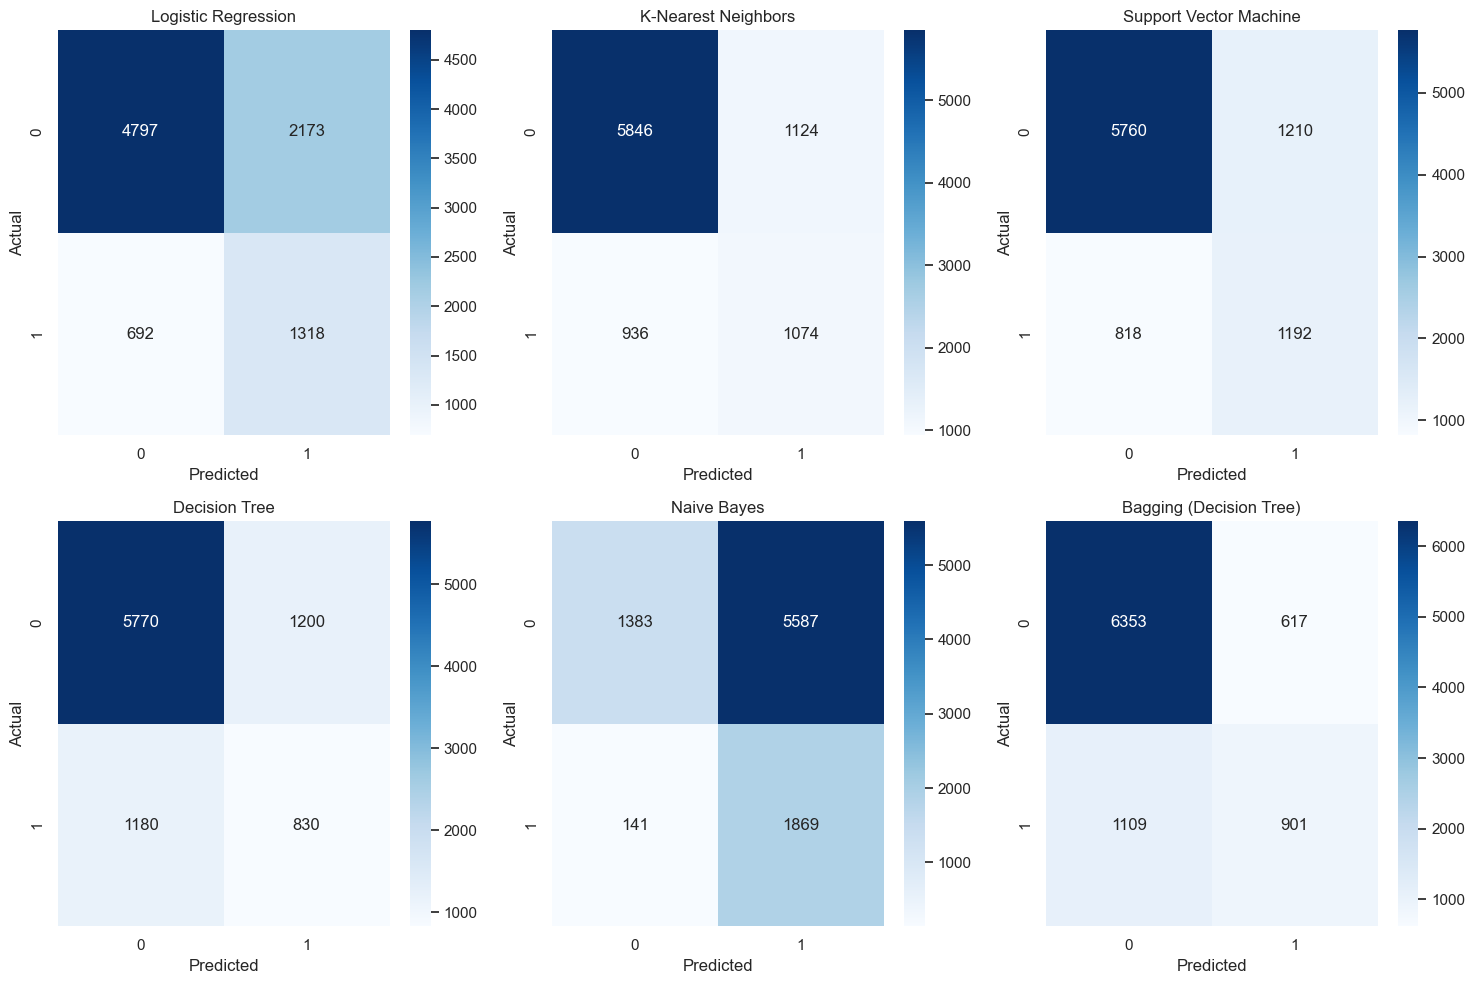

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (model, name) in enumerate(models.items()):
    if idx >= 6: 
        break

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'{name.strip()}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
#plt.savefig('ConfusionMatrices.png', dpi=300, bbox_inches='tight')
plt.show()